In [1]:
#%matplotlib notebook
#%matplotlib inline
# standard imports 
from __future__ import division 
from __future__ import print_function 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from glob import glob 
from sunpy.net import Fido, attrs
from datetime import datetime, timedelta
import astropy.units as u 
import sunpy.map as smap 
from astropy.coordinates import SkyCoord 
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from datetime import datetime, timedelta
import matplotlib.dates as mdates 
import pickle

In [2]:
import AIA_tools as aia

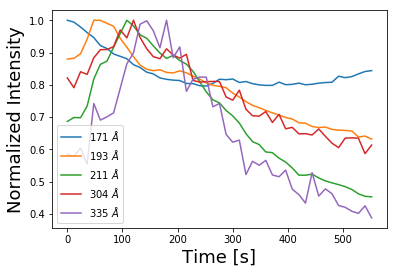

In [3]:
data = np.loadtxt('/data/khnum/REU2018/jwaczak/data/obs_data.txt', delimiter=',')

#for i in range(1,6):
    #data[i,:] = convolve(data[i,:], Gaussian1DKernel(stddev=5))
    #data[i,:] = convolve(data[i,:], Box1DKernel(3))
Dt = np.abs(data[0,1:]-data[0,:-1]).mean()
times = np.arange(0, len(data[0,:])*Dt, Dt)

fig, ax = plt.subplots()
ax.plot(times, data[1,:]/data[1,:].max(), label = '$171$ $\AA$')
ax.plot(times, data[2,:]/data[2,:].max(), label = '$193$ $\AA$')
ax.plot(times, data[3,:]/data[3,:].max(), label = '$211$ $\AA$')
ax.plot(times, data[4,:]/data[4,:].max(), label = '$304$ $\AA$')
ax.plot(times, data[5,:]/data[5,:].max(), label = '$335$ $\AA$')
ax.set_ylabel('Normalized Intensity', fontsize=18)
ax.set_xlabel('Time [s]', fontsize=18)
ax.legend()
plt.show()
#plt.savefig('/data/khnum/REU2018/jwaczak/data/figs/obs_tot.png')

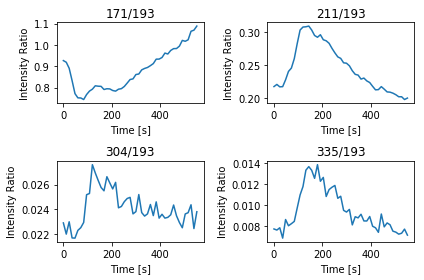

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2) 

ax[0,0].plot(times, np.divide(data[1,:], data[2,:]), label='171/193')
ax[0,1].plot(times, np.divide(data[3,:], data[2,:]), label='211/193')
ax[1,0].plot(times, np.divide(data[4,:], data[2,:]), label='304/193')
ax[1,1].plot(times, np.divide(data[5,:], data[2,:]), label='335/193')

ax[0,0].set_ylabel("Intensity Ratio")
ax[0,1].set_ylabel("Intensity Ratio")
ax[1,0].set_ylabel("Intensity Ratio")
ax[1,1].set_ylabel("Intensity Ratio")

ax[0,0].set_xlabel("Time [s]")
ax[0,1].set_xlabel("Time [s]")
ax[1,0].set_xlabel("Time [s]")
ax[1,1].set_xlabel("Time [s]")

ax[0,0].set_title('171/193')
ax[0,1].set_title('211/193')
ax[1,0].set_title('304/193')
ax[1,1].set_title('335/193') 


plt.tight_layout()
plt.show()
#plt.savefig('/data/khnum/REU2018/jwaczak/data/figs/obs_ratios.png') 

In [5]:
emissFiles = aia.simulation.getEmissList( '/data/khnum/REU2018/jwaczak/data/chiantiEmissData')
emissData = aia.simulation.getEmissData(emissFiles[26][12][7])

In [6]:
temps = emissData['logte_1d']
temps = np.power(10.0, temps) 
lowIndex = aia.analysis.getNearestValue(temps, 1.0e6) 
highIndex = aia.analysis.getNearestValue(temps, 5.0e7)
temps = temps[40:75]
print(temps.min(), temps.max(), len(temps))

np.savetxt('/data/khnum/REU2018/jwaczak/data/tempVals.txt', temps, delimiter=',')

1000000.0 50118701.35142811 35


In [7]:
T_data = np.loadtxt('/data/khnum/REU2018/jwaczak/data/tempVals.txt')
print(T_data)

[ 1000000.          1122018.94707379  1258926.51759257  1412537.85480421
  1584892.49640272  1778279.41003892  1995263.19125487  2238723.10498687
  2511886.98309887  2818381.69347814  3162277.66016838  3548135.45061708
  3981075.20237655  4466836.9023895   5011870.13514281  5623413.25190349
  6309576.21586153  7079464.06220276  7943284.0915213   8912505.46711345
 10000000.         11220189.47073786 12589265.17592568 14125378.54804205
 15848924.96402718 17782794.10038923 19952631.91254866 22387231.04986867
 25118869.83098868 28183816.93478142 31622776.60168379 35481354.50617082
 39810752.02376552 44668369.02389504 50118701.35142811]


In [10]:
dataFile = aia.simulation.run()

In [9]:
print(10**6.8)

6309573.4448
